# Trabajo Practico N1 - Problema de clasificacion y regresion.

Autor: Francisco Ledesma

In [2]:
from functions import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.model_selection import train_test_split

## Problema de Clasificacion Multiclase
Para este problema se utilizo un dataset "Anclaje de proteínas de levaduras basado en información de las secuencias de aminoácidos que forman a la proteína" <br>
URL:  (https://archive.ics.uci.edu/ml/datasets/Yeast)

### Dataset Yeast
Cargamos el dataset en df

In [5]:
columns = ["mcg","gvh","alm","mit","erl","pox","vac","nuc"]
df = pd.read_csv("yeast.data",names = columns + ['Class'], sep='\s+')
# df = df.drop(["erl", "pox"], axis=1)
# columns = ["mcg","gvh","alm","mit","vac","nuc"]

In [6]:
df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


## Balance de clases
nota: deberia realizarlo solo con la parte de training del dataset

In [7]:
class_vector = []
for it in df['Class']:
    if it not in class_vector:
        class_vector.append(it)

balance_class={}
for it in class_vector:
    print(it+':',sum(df['Class'].values==it), ' \tP(Y = '+it+') =' , round(sum(df['Class'].values==it)/df.shape[0],4))
    balance_class[it] = sum(df['Class'].values==it)/df.shape[0]

MIT: 244  	P(Y = MIT) = 0.1644
NUC: 429  	P(Y = NUC) = 0.2891
CYT: 463  	P(Y = CYT) = 0.312
ME1: 44  	P(Y = ME1) = 0.0296
EXC: 35  	P(Y = EXC) = 0.0236
ME2: 51  	P(Y = ME2) = 0.0344
ME3: 163  	P(Y = ME3) = 0.1098
VAC: 30  	P(Y = VAC) = 0.0202
POX: 20  	P(Y = POX) = 0.0135
ERL: 5  	P(Y = ERL) = 0.0034


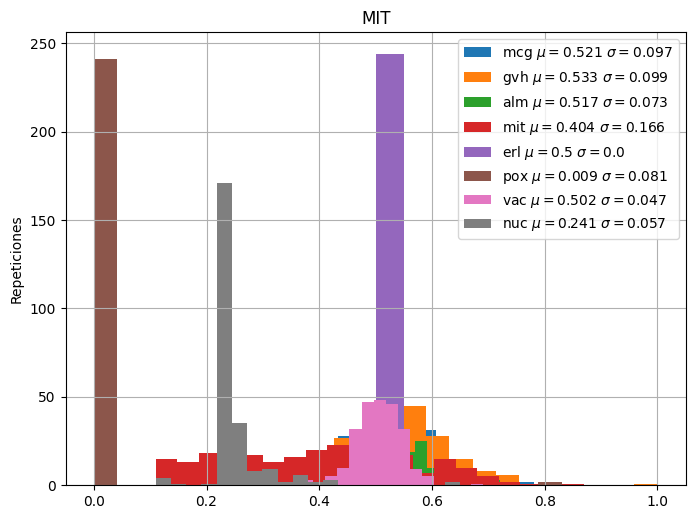

In [8]:
#plot_data(class_vector,df,columns)
plot_data(class_vector,df,columns,onlyclass=['MIT'])

c:\Users\FranciscoDanielLedes\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


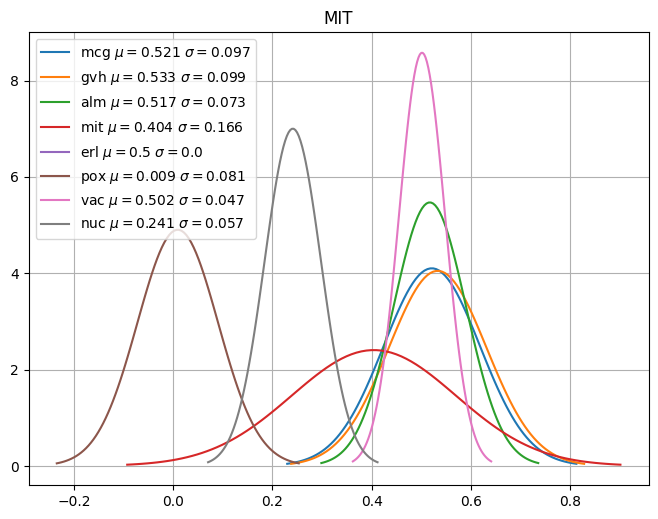

In [9]:
# plot_data_as_gaussian(class_vector,df,columns)
plot_data_as_gaussian(class_vector,df,columns,onlyclass=['MIT'])

## Analizo $\vec{\mu}$ y matriz de covarianza $\Sigma$ para cada clase

Name class: MIT
u_vector = [0.5214344262295082, 0.5332377049180328, 0.5173770491803279, 0.40442622950819673, 0.5, 0.008852459016393444, 0.5016803278688524, 0.2409836065573771]
cov_matrix:
         mcg     gvh     alm     mit  erl     pox     vac     nuc
mcg  0.0095  0.0035 -0.0013 -0.0008  0.0  0.0007  0.0006 -0.0000
gvh  0.0035  0.0097 -0.0027  0.0011  0.0  0.0002  0.0002  0.0001
alm -0.0013 -0.0027  0.0053 -0.0005  0.0 -0.0002 -0.0004 -0.0002
mit -0.0008  0.0011 -0.0005  0.0275  0.0 -0.0001 -0.0004  0.0018
erl  0.0000  0.0000  0.0000  0.0000  0.0  0.0000  0.0000  0.0000
pox  0.0007  0.0002 -0.0002 -0.0001  0.0  0.0066  0.0001 -0.0001
vac  0.0006  0.0002 -0.0004 -0.0004  0.0  0.0001  0.0022  0.0000
nuc -0.0000  0.0001 -0.0002  0.0018  0.0 -0.0001  0.0000  0.0032



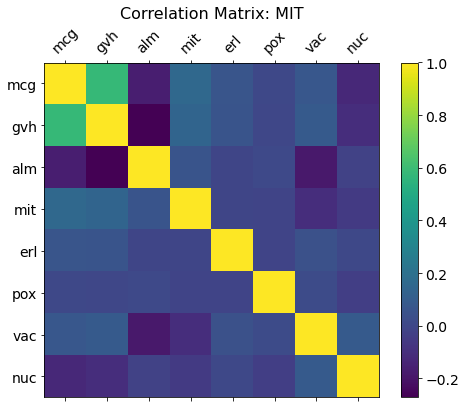

{'MIT': [[0.5214344262295082,
   0.5332377049180328,
   0.5173770491803279,
   0.40442622950819673,
   0.5,
   0.008852459016393444,
   0.5016803278688524,
   0.2409836065573771],
            mcg       gvh       alm       mit  erl       pox       vac       nuc
  mcg  0.009455  0.003537 -0.001266 -0.000841  0.0  0.000691  0.000631 -0.000008
  gvh  0.003537  0.009705 -0.002703  0.001130  0.0  0.000190  0.000217  0.000146
  alm -0.001266 -0.002703  0.005318 -0.000483  0.0 -0.000175 -0.000382 -0.000179
  mit -0.000841  0.001130 -0.000483  0.027506  0.0 -0.000108 -0.000450  0.001791
  erl  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000
  pox  0.000691  0.000190 -0.000175 -0.000108  0.0  0.006620  0.000074 -0.000118
  vac  0.000631  0.000217 -0.000382 -0.000450  0.0  0.000074  0.002163  0.000042
  nuc -0.000008  0.000146 -0.000179  0.001791  0.0 -0.000118  0.000042  0.003247]}

In [13]:
# meanVector_covMatrix(class_vector,df,columns)
meanVector_covMatrix(class_vector,df,columns,onlyclass=['MIT'])

In [11]:
import seaborn as sns

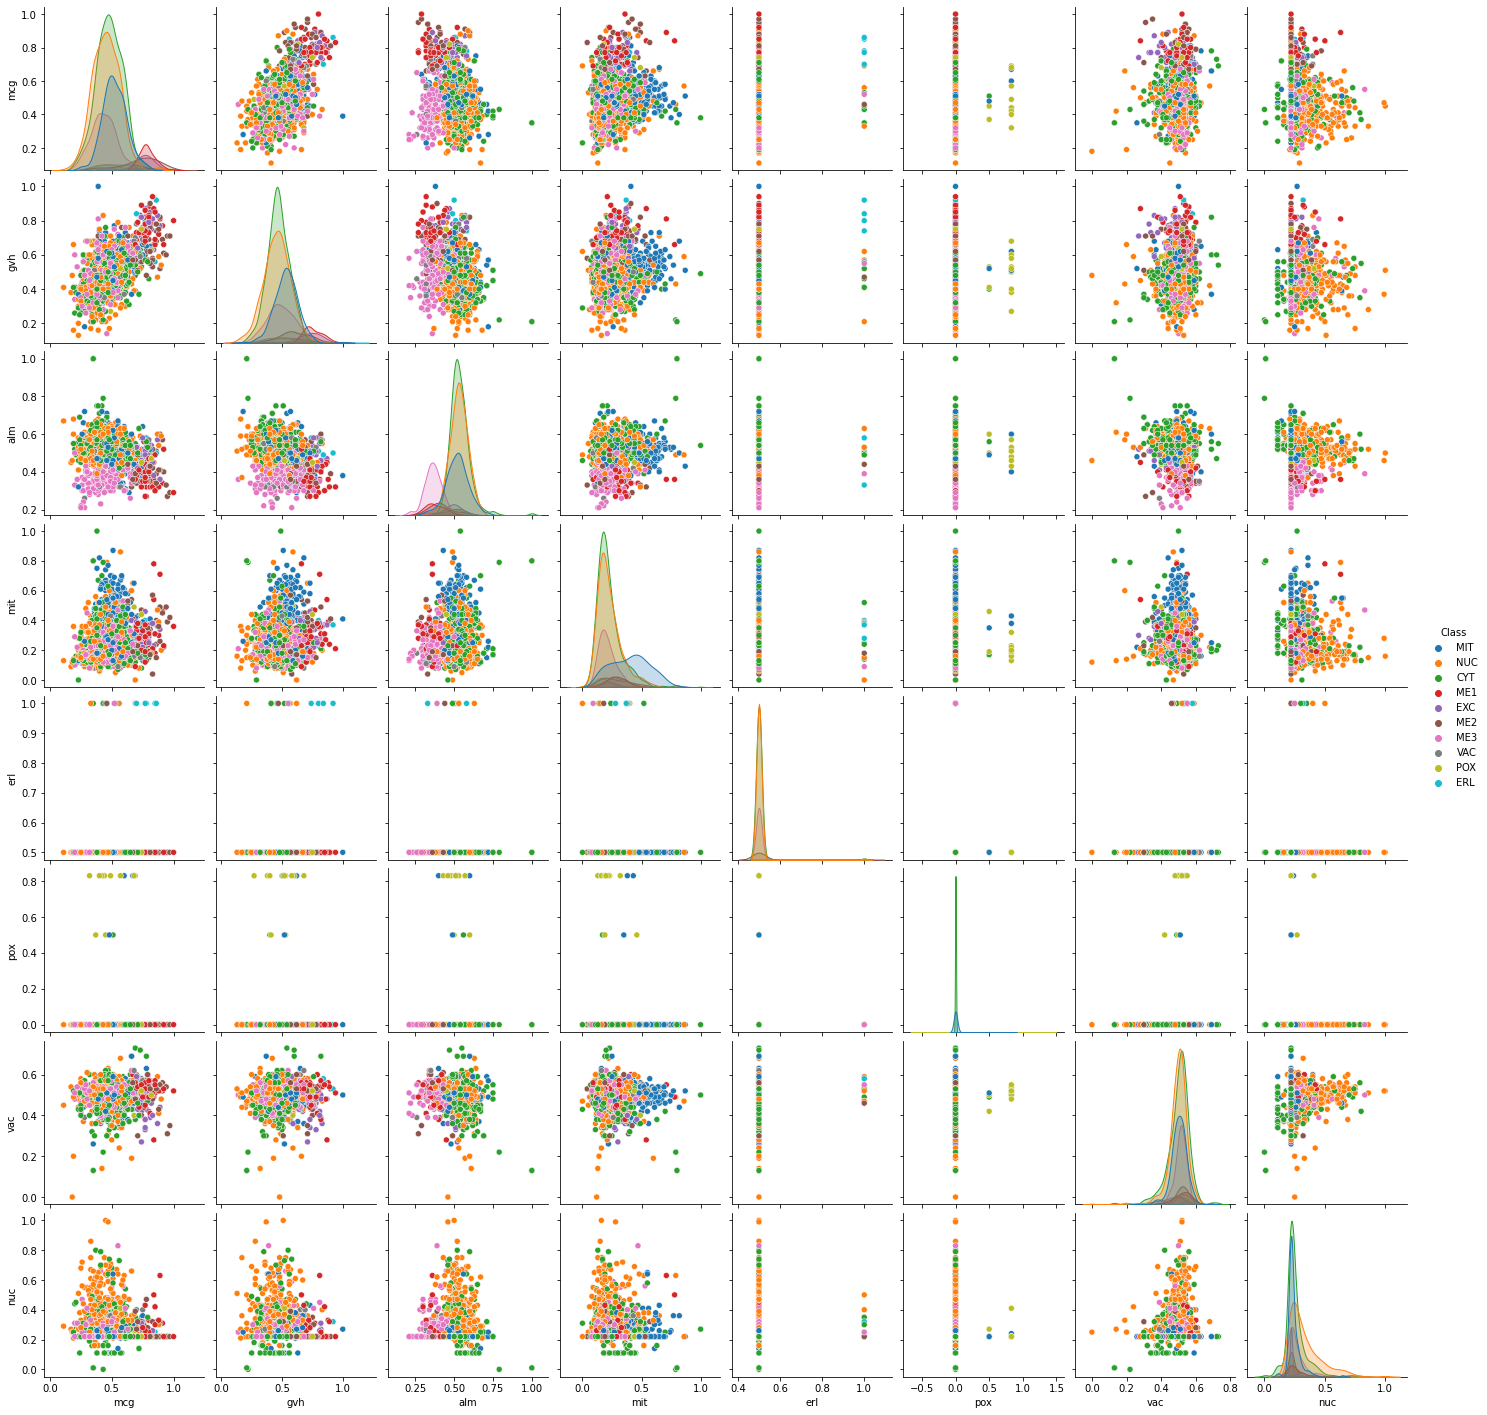

In [12]:
sns.pairplot(df.reset_index(),hue='Class')